# Load Data (5 points)
* Find a text dataset (you need a lot of data for a good model)
    * Scripts of Shakespear plays
    * Lyrics from your favorite songs
    * Books
    * Lines of code
    * Steal the Declaration of Independence
    * etc
    

In [35]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter
from itertools import chain
import seaborn as sns

In [36]:
taylor = open("TaylorSwift.txt", 'r')
taylor_list = []
tt_taylor_list = []
t_taylor_list = []
temp_taylor_list = []
new_taylor_list = []

for line in taylor.readlines():
    split = line.split('\n')
    #split = line.split(' ')
    for x in split:
        temp_taylor_list.append(x)
    #last_index = len(temp_taylor_list) - 1
    #del temp_taylor_list[last_index]   
    t_taylor_list.append(temp_taylor_list)
    temp_taylor_list = []

for temp_string in t_taylor_list:
    new_taylor_list.append(temp_string[0])

for x in new_taylor_list:
    temp_list = []
    temp_list.append(x)
    tt_taylor_list.append(temp_list)

for x in tt_taylor_list:
    str1 = ""
    str1 = str1.join(map(str, x))
    temp_split = str1.split(' ')
    empty_list = []
    for y in temp_split:
        empty_list.append(y)
    taylor_list.append(empty_list)

lower_taylor_lis = []    
for lis in taylor_list:
    empty_list = []
    for string in lis:
        new_string = string.lower()
        empty_list.append(new_string)
    lower_taylor_lis.append(empty_list)


In [37]:
line_count = []
for x in lower_taylor_lis:
    line_count.append(len(x))

print(line_count[:10])

[8, 8, 5, 7, 7, 5, 10, 12, 6, 7]


In [38]:
def unique(data):
    unique_list = []
    value_dict = []
    for x in data:
        for y in x:
            if(y not in unique_list):
                unique_list.append(y)
    for i in range(len(unique_list)):
        value_dict.append([unique_list[i], (i+1)])
    
    return value_dict

In [39]:
temp_taylor = []
for x in lower_taylor_lis:
    for i in range(len(x)):
        temp_taylor.append(x[i])

# Visuals (5 points)

* Make a bar plot show the most frequent 50 words and how many times they appear

53381
3102


Text(0,0.5,'Frequency')

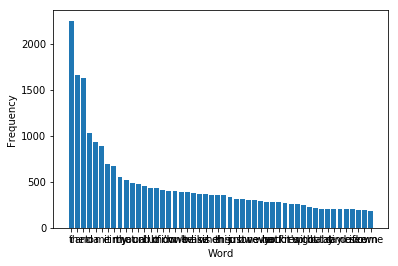

In [40]:
unique_dict = unique(lower_taylor_lis)
word_freq = Counter(temp_taylor)
temp_top50 = []
top50 = []
sorted_word = sorted(word_freq.items(), key=operator.itemgetter(1), reverse=True)

sum = 0
for x in line_count:
    sum += x
print(sum)
print(len(unique_dict))

for key, value in sorted_word:
    temp_top50.append([key, value])

for x in range(1, 51):
    top50.append(temp_top50[x])

labels=[]
count=[]
for x in top50:
    labels.append(x[0])
    count.append(x[1])

plt.bar(labels, count)
plt.xlabel("Word")
plt.ylabel("Frequency")

In [41]:
for x in range(len(labels)):
    print(labels[x] + ":" + str(count[x]))


i:2255
the:1665
and:1634
to:1030
a:931
me:895
it:699
in:676
my:558
that:520
your:488
on:481
all:450
but:436
of:433
know:407
i'm:405
don't:401
we:390
be:390
was:374
like:370
is:363
when:354
oh:353
this:352
so:335
just:318
now:313
love:300
:298
never:288
what:285
back:282
you're:277
for:268
it's:263
up:261
with:245
got:225
out:216
baby:209
at:205
say:204
time:202
do:202
if:200
see:195
down:194
come:186


# Part 1: Recurrent Neural Networks
---
* Build an RNN

In [42]:
num_taylor = []
num_taylor_sent = []

for lis in lower_taylor_lis:
    for temp in lis:
        for index in range(len(unique_dict)):
            if(temp == unique_dict[index][0]):
                num_taylor_sent.append(unique_dict[index][1])
    num_taylor.append(num_taylor_sent)
    num_taylor_sent = []

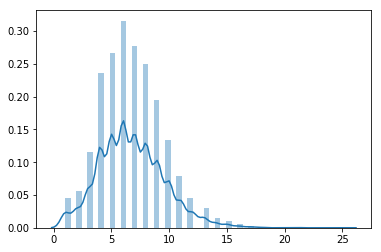

In [43]:
sns.distplot(line_count)

In [44]:
line_average = 8 #obtained from distribution plot above
fin_num_taylor = []

for lis in num_taylor:
    #print(lis)
    temp_storage = []
    if(len(lis) < line_average):
        variation = line_average - len(lis)
        while(variation > 0):
            temp_storage.append(0)
            variation -= 1
        for x in range(len(lis)):
            temp_storage.append(lis[x])
        fin_num_taylor.append(temp_storage)
    elif(len(lis) > line_average):
        variation = len(lis) - line_average
        for x in range(len(lis) - variation):
            temp_storage.append(lis[x])
        fin_num_taylor.append(temp_storage)
    else:
        temp_storage.append(lis)
        fin_num_taylor.append(lis)

#print(fin_num_taylor)
temp_line_avg = 0
for x in fin_num_taylor:
    temp_line_avg += len(x)

temp_line_avg = temp_line_avg / len(fin_num_taylor)
print(temp_line_avg == line_average)

True


In [45]:
train_set = []
val_set = []

split = int(0.9 * len(fin_num_taylor))
counter = 0

#Creating the training and validation sets
for x in range(len(fin_num_taylor)):
    train_set.append(fin_num_taylor[x])
    counter += 1
    if(counter == split):
        break
for x in range(split, len(fin_num_taylor)):
    val_set.append(fin_num_taylor[x])

print(len(train_set)), print(split)
print(len(val_set)), print(len(fin_num_taylor) - split)

7112
7112
791
791


(None, None)

In [46]:
vocab = len(unique_dict)

model = Sequential()
model.add(Embedding(vocab, 128, input_length=line_average))
model.add(LSTM(256, return_sequences=True))
model.add(Dense(vocab, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 128)            397056    
_________________________________________________________________
lstm_4 (LSTM)                (None, 8, 256)            394240    
_________________________________________________________________
dense_6 (Dense)              (None, 8, 3102)           797214    
Total params: 1,588,510
Trainable params: 1,588,510
Non-trainable params: 0
_________________________________________________________________


### Train
* You should have a training set and validation set
* Obviously the data in the training set cannot appear in the validation set
* Process the data so words are given numeric IDs
    * This is necessary for the embedding layer
    

In [47]:
training = []
testing = []
for x in train_set:
    for y in x:
        training.append(y)
for x in val_set:
    for y in x:
        testing.append(y)

#I don't understand why the index is out of range
np_train = np.asarray(train_set)
np_val = np.asarray(val_set)
np_test = to_categorical(np_train, num_classes=vocab)

In [48]:
print(np_train.shape), print(np_test.shape)
model.fit(np_train, np_test, epochs=25)

(7112, 8)
(7112, 8, 3102)
Epoch 1/25
7112/7112 [==============================] - 21s 3ms/step - loss: 7.9726 - acc: 0.2241
Epoch 2/25
7112/7112 [==============================] - 15s 2ms/step - loss: 7.8354 - acc: 0.2289
Epoch 3/25
7112/7112 [==============================] - 15s 2ms/step - loss: 7.6944 - acc: 0.2289
Epoch 4/25
7112/7112 [==============================] - 15s 2ms/step - loss: 7.5445 - acc: 0.2289
Epoch 5/25
7112/7112 [==============================] - 15s 2ms/step - loss: 7.3752 - acc: 0.2289
Epoch 6/25
7112/7112 [==============================] - 15s 2ms/step - loss: 7.1643 - acc: 0.2289
Epoch 7/25
7112/7112 [==============================] - 15s 2ms/step - loss: 6.8787 - acc: 0.2289
Epoch 8/25
7112/7112 [==============================] - 15s 2ms/step - loss: 6.6189 - acc: 0.2289
Epoch 9/25
7112/7112 [==============================] - 15s 2ms/step - loss: 6.4587 - acc: 0.2289
Epoch 10/25
7112/7112 [==============================] - 15s 2ms/step - loss: 6.3253 - acc: 

### Generate sample sequence
* Start with random input word and pass the output from one time step back into the network at the next until you have a full sentence
* Show what this sentence is 
* You need to decode the softmax scores back to their word IDs and show the actual words


In [50]:
from random import randint

predict = model.predict(np_train)
predict

array([[[3.63655649e-02, 4.10476874e-04, 3.93883500e-04, ...,
         2.92970333e-04, 2.89421558e-04, 3.11744836e-04],
        [3.07664536e-02, 4.98431735e-04, 4.72853280e-04, ...,
         2.76653358e-04, 2.70652759e-04, 3.14513949e-04],
        [2.14269757e-02, 6.11840282e-04, 5.71404235e-04, ...,
         2.50519020e-04, 2.44136012e-04, 3.07217153e-04],
        ...,
        [7.73171836e-04, 8.13395891e-04, 7.53998291e-04, ...,
         1.64721932e-04, 1.68601502e-04, 2.41615562e-04],
        [3.77493736e-04, 8.22311558e-04, 7.64547265e-04, ...,
         1.47121784e-04, 1.52441047e-04, 2.22033414e-04],
        [2.36378764e-04, 8.23470065e-04, 7.66098790e-04, ...,
         1.34722519e-04, 1.41564145e-04, 2.07662277e-04]],

       [[3.00062504e-02, 4.11394867e-04, 3.94174276e-04, ...,
         2.96481128e-04, 2.92204058e-04, 3.12706718e-04],
        [2.56933440e-02, 4.97264205e-04, 4.70773521e-04, ...,
         2.79305445e-04, 2.74399295e-04, 3.16070131e-04],
        [1.38739245e-02, 

In [51]:
predict.shape

prediction_list = np.argmax(predict, axis=2)

prediction_list.shape
back_to_words = []
for x in prediction_list:
    storage = []
    for y in x:
        for temp in range(len(unique_dict)):
            index = unique_dict[temp]
            if(y == index[1]):
                storage.append(index[0])
    back_to_words.append(storage)

In [55]:
randomindex = randint(0, len(prediction_list) - 1)
back_to_words[randomindex]

final_sent = ""
for x in back_to_words[randomindex]:
    final_sent += x + " "

print("Predicted Sentece: " + final_sent)

Predicted Sentece: you you you you you 


# Part 2: Attention
---
* Build a recurrent model with attention over past hidden states

In [56]:
#Taken from your github
embedded = Input(shape=(8, 1))
activations = LSTM(128, return_sequences=True)(embedded)
attention = Dense(1, activation='tanh')(activations)
attention = Flatten()(attention)
attention = Activation('softmax')(attention)
attention = RepeatVector(128)(attention)
attention = Permute([2, 1])(attention)
sent_representation = multiply([activations, attention])
#3102 is the amount of words in my unique dictionary
output = Dense(3102)(sent_representation)
attn_model = Model(inputs=embedded, outputs=output)
attn_model.compile(loss='mean_squared_error', optimizer='adam')
attn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 8, 1)         0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   (None, 8, 128)       66560       input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 8, 1)         129         lstm_5[0][0]                     
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 8)            0           dense_7[0][0]                    
__________________________________________________________________________________________________
activation

### Train


In [58]:
np_train = np_train.reshape((7112, 8, 1))
attn_model.fit(np_train, np_test, epochs = 20)

Epoch 1/20
7112/7112 [==============================] - 5s 705us/step - loss: 2.8268e-04
Epoch 2/20
7112/7112 [==============================] - 5s 689us/step - loss: 2.4331e-04
Epoch 3/20
7112/7112 [==============================] - 5s 685us/step - loss: 2.3191e-04
Epoch 4/20
7112/7112 [==============================] - 5s 683us/step - loss: 2.2736e-04
Epoch 5/20
7112/7112 [==============================] - 5s 682us/step - loss: 2.2471e-04
Epoch 6/20
7112/7112 [==============================] - 5s 684us/step - loss: 2.2263e-04
Epoch 7/20
7112/7112 [==============================] - 5s 680us/step - loss: 2.2091e-04
Epoch 8/20
7112/7112 [==============================] - 5s 685us/step - loss: 2.1945e-04
Epoch 9/20
7112/7112 [==============================] - 5s 679us/step - loss: 2.1793e-04
Epoch 10/20
7112/7112 [==============================] - 5s 677us/step - loss: 2.1651e-04
Epoch 11/20
7112/7112 [==============================] - 5s 683us/step - loss: 2.1519e-04
Epoch 12/20
7112/71

### Generate sample sequence
* Start with random input word and pass the output from one time step back into the network at the next until you have a full sentence
* Show what this sentence is 
* You need to decode the softmax scores back to their word IDs and show the actual words


In [59]:
attn_predict = attn_model.predict(np_train)
attn_predict

array([[[ 4.40591156e-01,  6.12243190e-02,  2.87215300e-02, ...,
         -2.52159662e-04, -9.07460693e-04, -1.00498623e-03],
        [ 1.21836275e-01,  8.41256976e-02,  4.32458110e-02, ...,
         -7.77947833e-04, -2.61683157e-03, -1.15188153e-03],
        [ 4.21142280e-02,  6.92809671e-02,  3.63967083e-02, ...,
         -9.67233093e-04, -2.68901419e-03, -1.41908636e-03],
        ...,
        [-6.53052330e-03,  1.66085698e-02,  8.97091627e-03, ...,
          3.54619347e-04, -4.67299204e-03, -1.30035763e-03],
        [ 1.39576942e-02,  1.07705072e-02,  1.11432113e-02, ...,
          3.68739595e-04, -4.65173274e-03, -1.13108254e-05],
        [ 3.41899842e-02,  8.67235474e-03,  1.45434067e-02, ...,
          2.66318326e-04, -4.08074632e-03,  1.03115535e-03]],

       [[-7.17951357e-02,  6.95763677e-02,  4.84496653e-02, ...,
         -2.26973920e-04,  7.26777129e-04,  1.63903541e-03],
        [-2.35661417e-02,  4.30150740e-02,  3.18807550e-02, ...,
         -3.70354275e-04,  3.22175678e

### Attention Visuals
* Make a sample input sequence
* Feed it to your network
* Visualize the attention scores
* It needs to look like [this](https://skymind.ai/images/wiki/attention_translation_grid.png)

In [60]:
attention_list = np.argmax(attn_predict, axis=2)

back_to_words_attn = []
for x in attention_list:
    storage = []
    for y in x:
        for temp in range(len(unique_dict)):
            index = unique_dict[temp]
            if(y == index[1]):
                storage.append(index[0])
    back_to_words_attn.append(storage)

In [64]:
from random import randint

random_index_attn = randint(0, len(attention_list) - 1)

final_sent_attn = ""
for x in back_to_words_attn[random_index_attn]:
    final_sent_attn += x + " "

print("Predicted Sentece: " + final_sent_attn)

Predicted Sentece: but this i don't me me don't 
